In [7]:
data <- read.csv("C:\\Users\\HP\\downloads\\cereals.csv", header = TRUE,
                 stringsAsFactors = FALSE,
                 strip.white = TRUE ,
                 sep = ',')
head(data)

name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
100%_Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1,0.33,68.40297
100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1,1.00,33.98368
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1,0.33,59.42551
All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1,0.50,93.70491
Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1,0.75,34.38484
Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1,0.75,29.50954


In [8]:
df = data[c(-1,-2,-3,-13,-14,-15)]

In [9]:
head(df)

calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating
70,4,1,130,10.0,5.0,6,280,25,68.40297
120,3,5,15,2.0,8.0,8,135,0,33.98368
70,4,1,260,9.0,7.0,5,320,25,59.42551
50,4,0,140,14.0,8.0,0,330,25,93.70491
110,2,2,200,1.0,14.0,8,-1,25,34.38484
110,2,2,180,1.5,10.5,10,70,25,29.50954


In [10]:
library(randomForest)
set.seed(71) 
rf <-randomForest(rating~.,data=df, ntree=500) 
print(rf)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.



Call:
 randomForest(formula = rating ~ ., data = df, ntree = 500) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 3

          Mean of squared residuals: 35.67388
                    % Var explained: 82.27


,IncNodePurity
calories,3501.0663
protein,841.0602
fat,534.1421
sodium,1196.0811
fiber,1355.0597
carbo,664.7878
sugars,4570.2355
potass,1113.6322
vitamins,442.2558


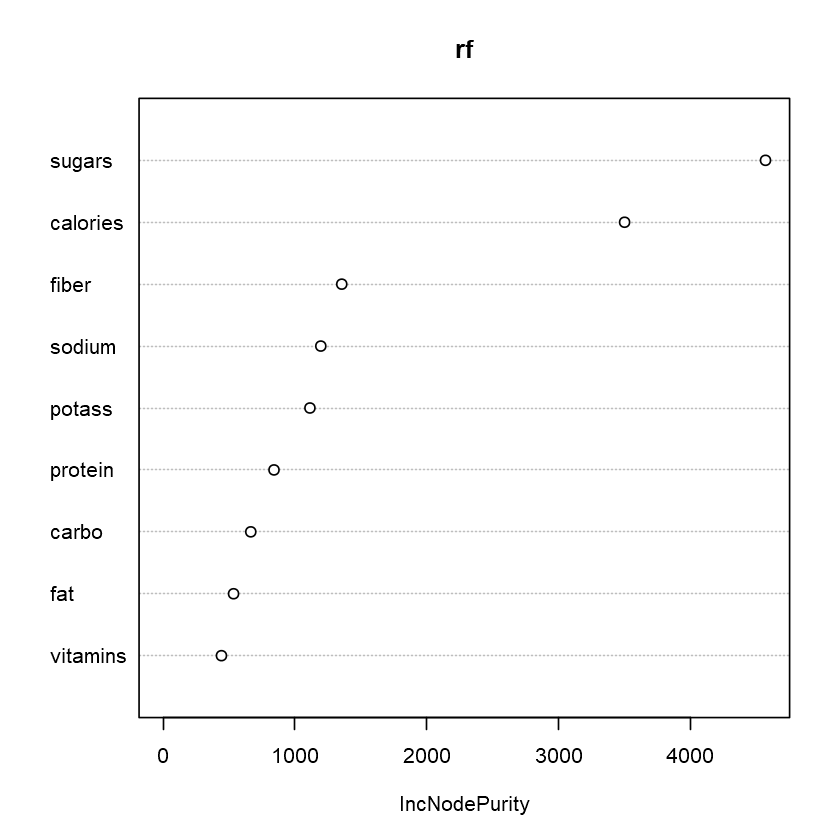

In [11]:
#Evaluate variable importance
importance(rf)
varImpPlot(rf)

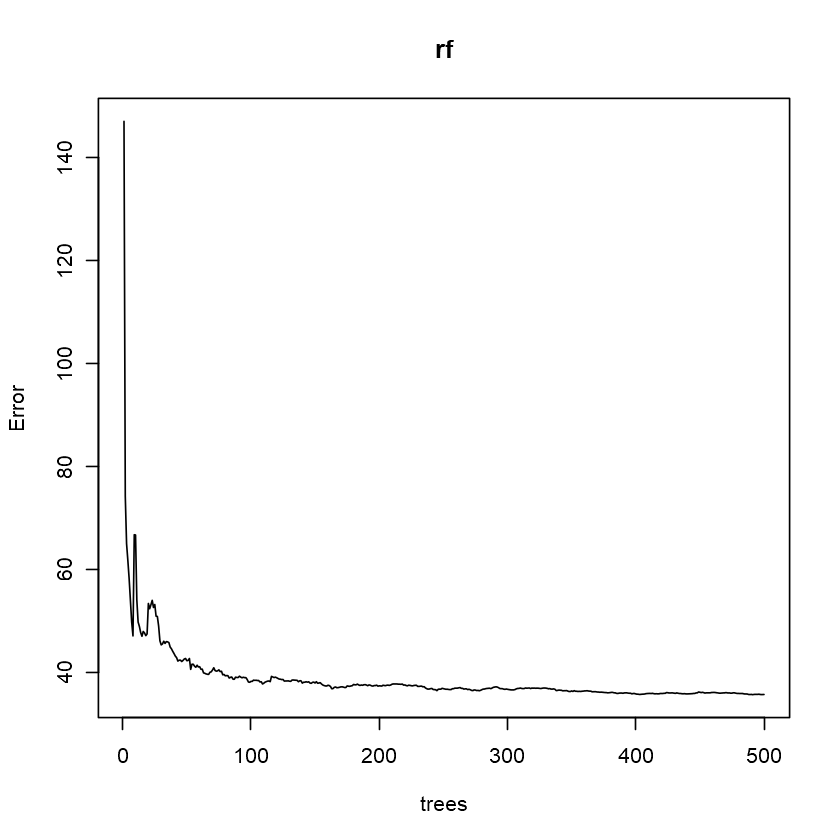

In [12]:
plot(rf)

In [17]:
library("rpart")

# grow tree 
fit <- rpart(rating ~  sugars+calories+fiber , method="anova", data=df)

printcp(fit) # display the results


Regression tree:
rpart(formula = rating ~ sugars + calories + fiber, data = df, 
    method = "anova")

Variables actually used in tree construction:
[1] calories fiber    sugars  

Root node error: 14887/74 = 201.18

n= 74 

        CP nsplit rel error  xerror     xstd
1 0.537434      0   1.00000 1.03455 0.207926
2 0.196780      1   0.46257 0.51476 0.133728
3 0.030657      2   0.26579 0.37612 0.090576
4 0.019821      3   0.23513 0.34749 0.083657
5 0.010000      4   0.21531 0.32143 0.082620


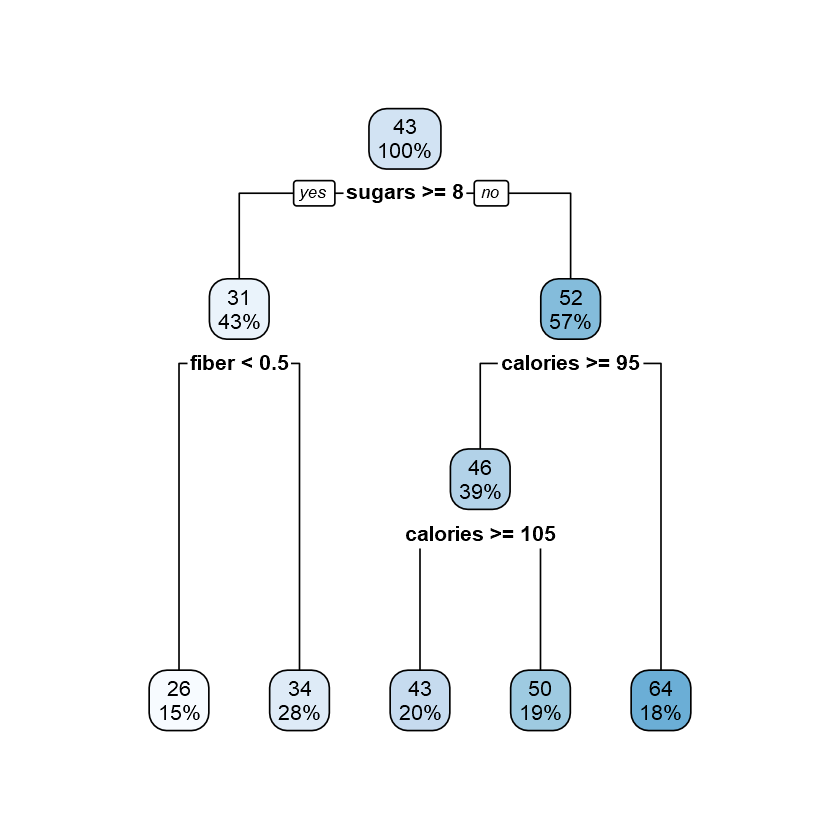

In [19]:
library(rpart.plot)
rpart.plot(fit)